In [1]:
%load_ext autoreload
%autoreload 2

from bayesmixture import bayesmixture as bmix

import numpy as np
import pandas as pd
from time import sleep
import sys
import seaborn as sns

# Import galaxies data

In [2]:
galaxies=np.genfromtxt('galaxies.txt')
galaxies=galaxies/1000


#### Create the mixture models objects

Create mixture models with a normal-inverse gamma prior and hyperparameters as described in the article for $K=3,5,6$ and $8$

In [3]:
galK3=bmix.mixnorm1d(np.transpose(np.array([galaxies])),k=3)
galK5=bmix.mixnorm1d(np.transpose(np.array([galaxies])),k=5)
galK6=bmix.mixnorm1d(np.transpose(np.array([galaxies])),k=6)
galK8=bmix.mixnorm1d(np.transpose(np.array([galaxies])),k=8)

# Figure 1

Figure 1 shows the boxplots for the 20 repetitions of marginal likelihood estimators for all the values of $K$ considered.

In [4]:
K=[3,5,6,8]

#### Hyperparameters configuration for $K=3$

In [5]:
methodsK3={'Chib':'chibEstimatorV2','ChibPerm':'chibEstimatorV2','BridgeSampling':'BridgeSampling',
           'adaptiveSMC':'adaptiveSMC','SIS':'SISv2','ChibPartition':'chibEstimatorPartitions',
           'arithmeticMean':'arithmeticMean'}
hyperParametersK3={}
hyperParametersK3['Chib']={'numIterGibbs':10,'burnIn':1,'permutationChib':False}
hyperParametersK3['ChibPerm']={'numIterGibbs':10,'burnIn':1,'permutationChib':True}
hyperParametersK3['BridgeSampling']={'numIterGibbs':10, 'burnIn':1, 'M0':2}
hyperParametersK3['adaptiveSMC']={'numParticles':10,'numGibbsStep':10,'ESSThreshold':0.8,'maxIterBissection':100}
hyperParametersK3['SIS']={'numSim':10}
hyperParametersK3['ChibPartition']={'numIterGibbs':10,'burnIn':1,}
hyperParametersK3['arithmeticMean']={'numSim':10}

#### Hyperparameters configuration for $K=5$

In [6]:
methodsK5={'Chib':'chibEstimatorV2','ChibPerm':'chibEstimatorV2','BridgeSampling':'BridgeSampling',
           'adaptiveSMC':'adaptiveSMC','SIS':'SISv2','ChibPartition':'chibEstimatorPartitions',
           'arithmeticMean':'arithmeticMean'}
hyperParametersK5={}
hyperParametersK5['Chib']={'numIterGibbs':10,'burnIn':1,'permutationChib':False}
hyperParametersK5['ChibPerm']={'numIterGibbs':10,'burnIn':1,'permutationChib':True}
hyperParametersK5['BridgeSampling']={'numIterGibbs':10, 'burnIn':1, 'M0':2}
hyperParametersK5['adaptiveSMC']={'numParticles':10,'numGibbsStep':1,'ESSThreshold':0.8,'maxIterBissection':100}
hyperParametersK5['SIS']={'numSim':10}
hyperParametersK5['ChibPartition']={'numIterGibbs':10,'burnIn':1,}
hyperParametersK5['arithmeticMean']={'numSim':10}

#### Hyperparameters configuration for $K=6$

In [7]:
methodsK6={'Chib':'chibEstimatorV2','ChibRandPerm':'chibEstimatorV2',
           'adaptiveSMC':'adaptiveSMC','SIS':'SISv2','ChibPartition':'chibEstimatorPartitions',
           'arithmeticMean':'arithmeticMean'}
hyperParametersK6={}
hyperParametersK6['Chib']={'numIterGibbs':10,'burnIn':1,'permutationChib':False}
hyperParametersK6['ChibRandPerm']={'numIterGibbs':10,'burnIn':1,'permutationChib':True,'numRandPermut':10}
hyperParametersK6['adaptiveSMC']={'numParticles':10,'numGibbsStep':10,'ESSThreshold':0.8,'maxIterBissection':100}
hyperParametersK6['SIS']={'numSim':10}
hyperParametersK6['ChibPartition']={'numIterGibbs':10,'burnIn':1,}
hyperParametersK6['arithmeticMean']={'numSim':10}

#### Hyperparameters configuration for $K=8$

In [8]:
methodsK8={'Chib':'chibEstimatorV2','ChibRandPerm':'chibEstimatorV2',
           'adaptiveSMC':'adaptiveSMC','SIS':'SISv2','ChibPartition':'chibEstimatorPartitions',
           'arithmeticMean':'arithmeticMean'}
hyperParametersK8={}
hyperParametersK8['Chib']={'numIterGibbs':10,'burnIn':1,'permutationChib':False}
hyperParametersK8['ChibRandPerm']={'numIterGibbs':10,'burnIn':1,'permutationChib':True,'numRandPermut':10}
hyperParametersK8['adaptiveSMC']={'numParticles':10,'numGibbsStep':10,'ESSThreshold':0.8,'maxIterBissection':100}
hyperParametersK8['SIS']={'numSim':10}
hyperParametersK8['ChibPartition']={'numIterGibbs':10,'burnIn':1,}
hyperParametersK8['arithmeticMean']={'numSim':10}

#### Compute the estimators of the marginal likelihood

In [9]:
df1_list=[]
repetitions=20

for k in K:
    j=0
    print('\nMixture of ',k,' components : ')
    hyperParams='hyperParametersK'+str(k)
    methods='methodsK'+str(k)
    data='gal'+'K'+str(k)
    for method in eval(methods):
        for l in range(repetitions):
            i=(j+1)/(repetitions*len(eval(hyperParams)))*100
            sys.stdout.write('\r')
            sys.stdout.write("[%-25s] %d%%" % ('='*int(i/4), i))
            sys.stdout.flush()
            sleep(0.25)
            func = getattr(eval(data), eval(methods)[method])
            marginal=func(**eval(hyperParams)[method])
            df1_list.append([marginal,method,k])
            j+=1

    


Mixture of  3  components : 
[=========================] 100%
Mixture of  5  components : 
[=========================] 100%
Mixture of  6  components : 
[=========================] 100%
Mixture of  8  components : 
[=========================] 100%

#### Plot

In [12]:
df1=pd.DataFrame(df1_list, columns=['marginal', 'method', 'K'])


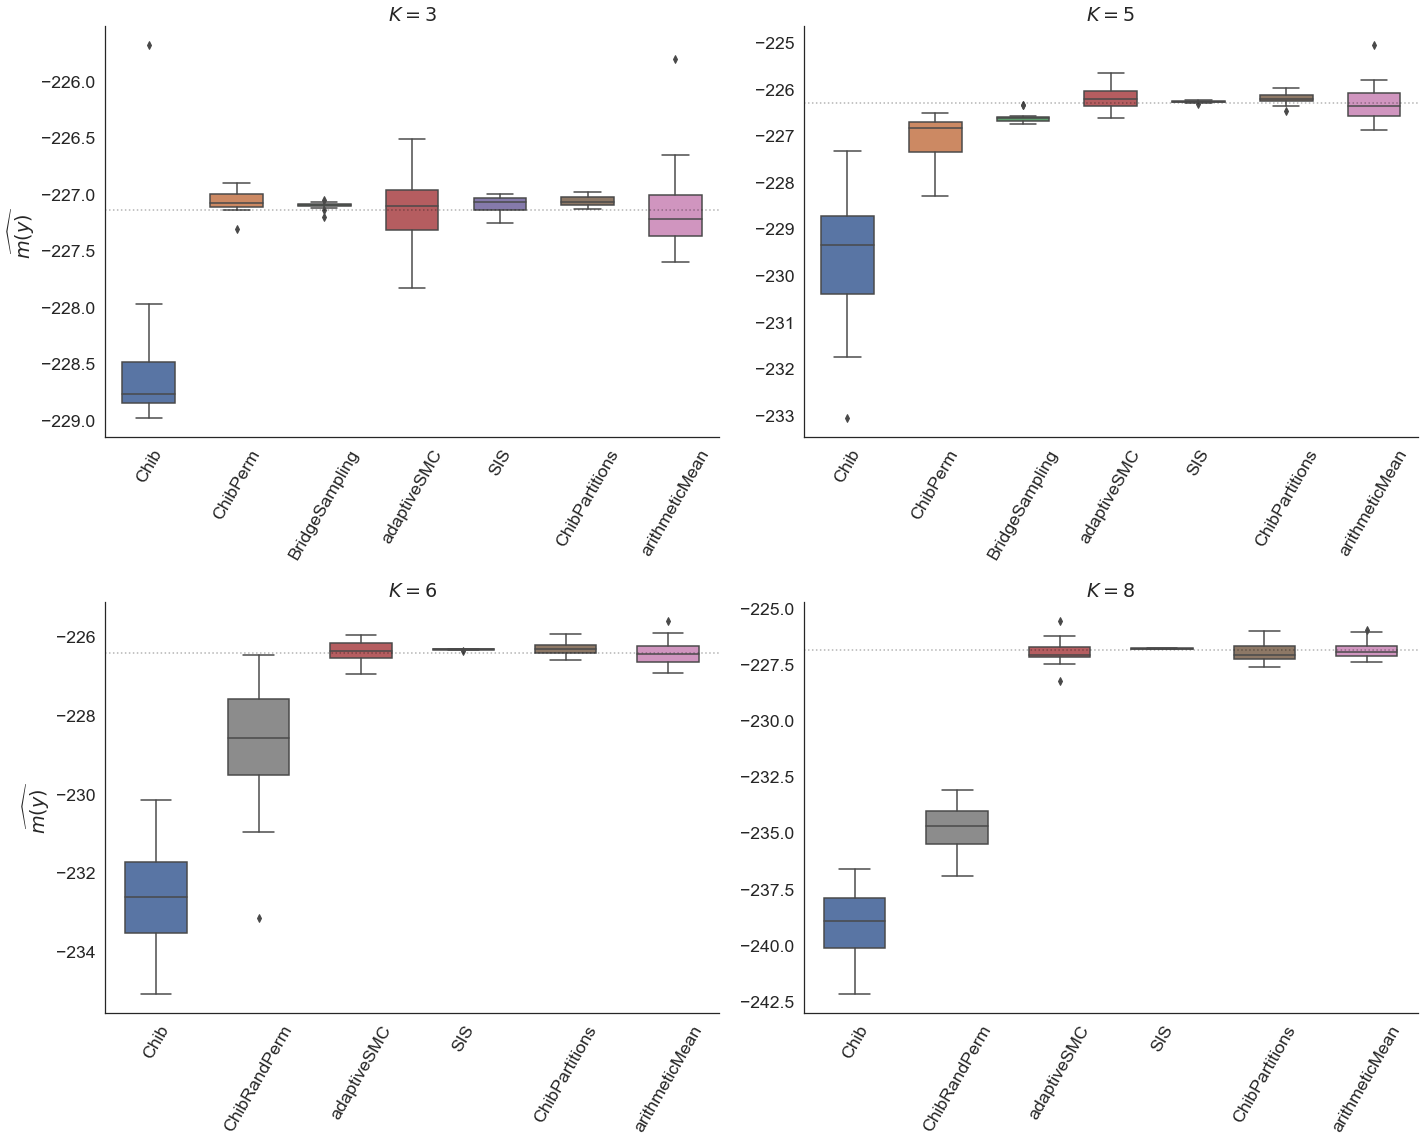

In [96]:

sns.set(font_scale = 1.6,style='white')

g=sns.catplot(x="method", y="marginal", data=df1, col="K", kind="box", sharex=False,sharey=False, hue="method", dodge=False,
              width=0.6,legend=True,col_wrap=2,height=8.27, aspect=10/8.27)
g.set_xticklabels(rotation=60)
g.fig.tight_layout()
g.set_ylabels('$\widehat {m(y)}$')
g.set_xlabels('')

g.axes[0].axhline(np.mean(df1[(df1['method']=='arithmeticMean') & (df1['K']==3)]['marginal']), ls=':',color='black',alpha=0.3)
g.axes[1].axhline(np.mean(df1[(df1['method']=='arithmeticMean') & (df1['K']==5)]['marginal']), ls=':',color='black',alpha=0.3)
g.axes[2].axhline(np.mean(df1[(df1['method']=='arithmeticMean') & (df1['K']==6)]['marginal']), ls=':',color='black',alpha=0.3)
g.axes[3].axhline(np.mean(df1[(df1['method']=='arithmeticMean') & (df1['K']==8)]['marginal']), ls=':',color='black',alpha=0.3)


g.axes[0].set_title('$K=3$')
g.axes[1].set_title('$K=5$')
g.axes[2].set_title('$K=6$')
g.axes[3].set_title('$K=8$')